<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.dummy import DummyRegressor
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [5]:
gold_recovery_train_new = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
gold_recovery_test_new = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
gold_recovery_full_new = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [6]:
def inf(x):
    display(x.describe())
    display(x.head())
    x.info()   

In [8]:
inf(gold_recovery_train_new)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [9]:
inf(gold_recovery_test_new)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [10]:
inf(gold_recovery_full_new)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE(метрику качества) между нашими расчётами и значением признака.

In [11]:
A = gold_recovery_train_new['rougher.output.concentrate_au']
B = gold_recovery_train_new['rougher.input.feed_au']
C = gold_recovery_train_new['rougher.output.tail_au']
output_recovery = gold_recovery_train_new['rougher.output.recovery']
calculated_recovery = A * (B - C) * 100 / (B * (A - C))
print('Абсолютная средняя ошибка =', mean_absolute_error(output_recovery, calculated_recovery))

Абсолютная средняя ошибка = 1.1131451184435918e-14


MAE с небольшим отклонением, значит, расчетное значение rougher.output.recovery совпадает с данными из столбца.

Посмотрим признаки, которых нет в тестовой выборке.

In [12]:
spare = set(gold_recovery_train_new.columns.to_list()) - set(gold_recovery_test_new.columns.to_list())
print(spare)

{'rougher.output.concentrate_ag', 'rougher.output.tail_ag', 'rougher.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.tail_ag', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio', 'final.output.tail_pb', 'final.output.concentrate_ag', 'final.output.concentrate_au', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_ag', 'final.output.tail_au', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'final.output.recovery', 'final.output.concentrate_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_pb',

In [13]:
gold_recovery_test_new = gold_recovery_test_new.merge(gold_recovery_full_new[['rougher.output.recovery','final.output.recovery']].loc[gold_recovery_test_new.index], on='date', how='left')
gold_recovery_test_new.shape

(5290, 54)

Заполним пропущенные значения в обучающей выборке. 

In [14]:
gold_recovery_train_new.fillna(method='ffill', inplace=True)
gold_recovery_train_new.isna().sum().sum()

0

### Вывод 

- Проверен расчет эффективности обогащения, отклонение незначительное.
- Проанализированы признаки, недоступные в тестовой выборке: расчётные и целевые.
- Проведена предобработка данных.
- Добавили недостающие 'rougher.output.recovery','final.output.recovery' в тестовую выборку.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

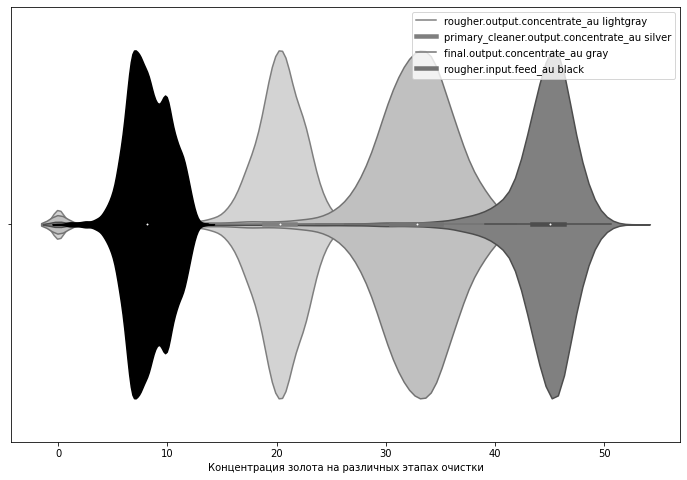

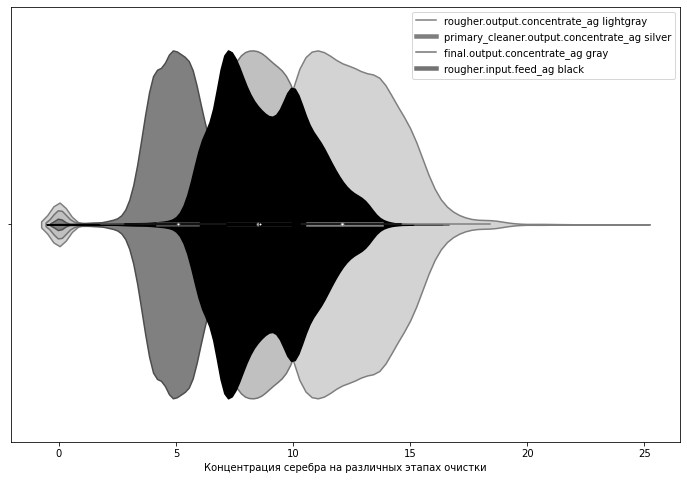

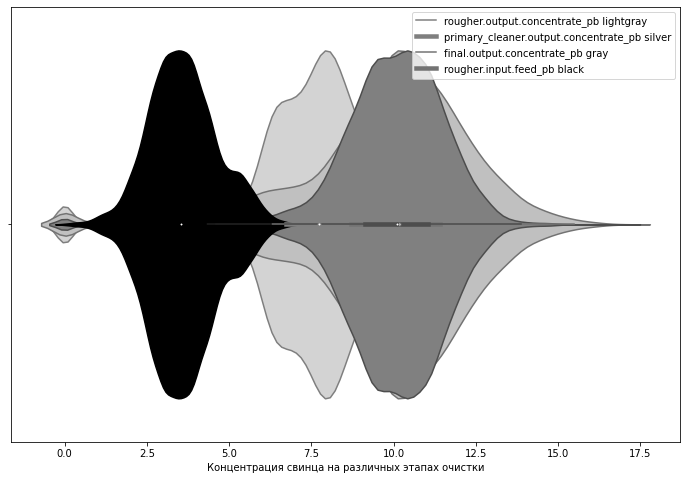

In [15]:
me = [('au', 'золота'), ('ag', 'серебра'), ('pb', 'свинца')]

concentrate = [('rougher.output.concentrate_', 'lightgray'), 
               ('primary_cleaner.output.concentrate_', 'silver'), 
               ('final.output.concentrate_', 'gray'), 
               ('rougher.input.feed_', 'black')]

for n in me:
    plt.figure(figsize=(12,8))
    lables= []
    for i in concentrate:
        m = sns.violinplot(x = gold_recovery_full_new[i[0] + n[0]], color=i[1])
        title = m.set(xlabel =  'Концентрация ' + n[1] + ' на различных этапах очистки')
        lables.append(f'{i[0]}{n[0]} {i[1]}')
    plt.legend(labels=lables)
    plt.show()

- Концентрация золота становится выше с каждым этапом очитки(от светло-серого к серому). 
- Концентрация серебра становится ниже с каждым этапом очистки.
- Концентрация свинца повышается значительно уже после первичной очистки.

Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

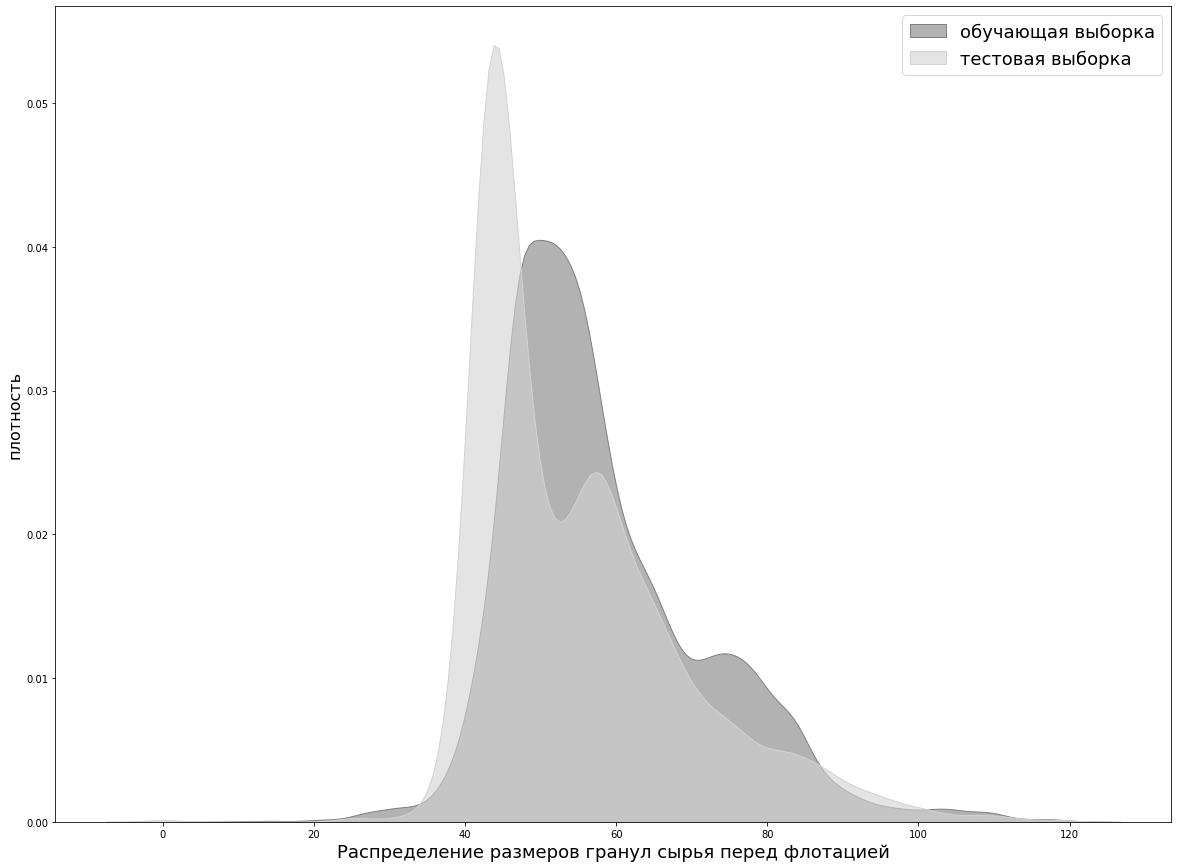

In [16]:
def size(train, test, titl):
    plt.subplots(1,figsize=(20, 15))
    sns.kdeplot(train.loc[train < 120], shade=True, color="gray", label="обучающая выборка", alpha=.6)
    sns.kdeplot(test.loc[test < 120], shade=True, color="lightgray", label="тестовая выборка", alpha=.6)
    plt.legend(fontsize=18)
    plt.xlabel('Распределение размеров гранул сырья '+ titl, fontsize=18)
    plt.ylabel('плотность', fontsize=16)
size(gold_recovery_train_new['rougher.input.feed_size'], gold_recovery_test_new['rougher.input.feed_size'], 'перед флотацией')

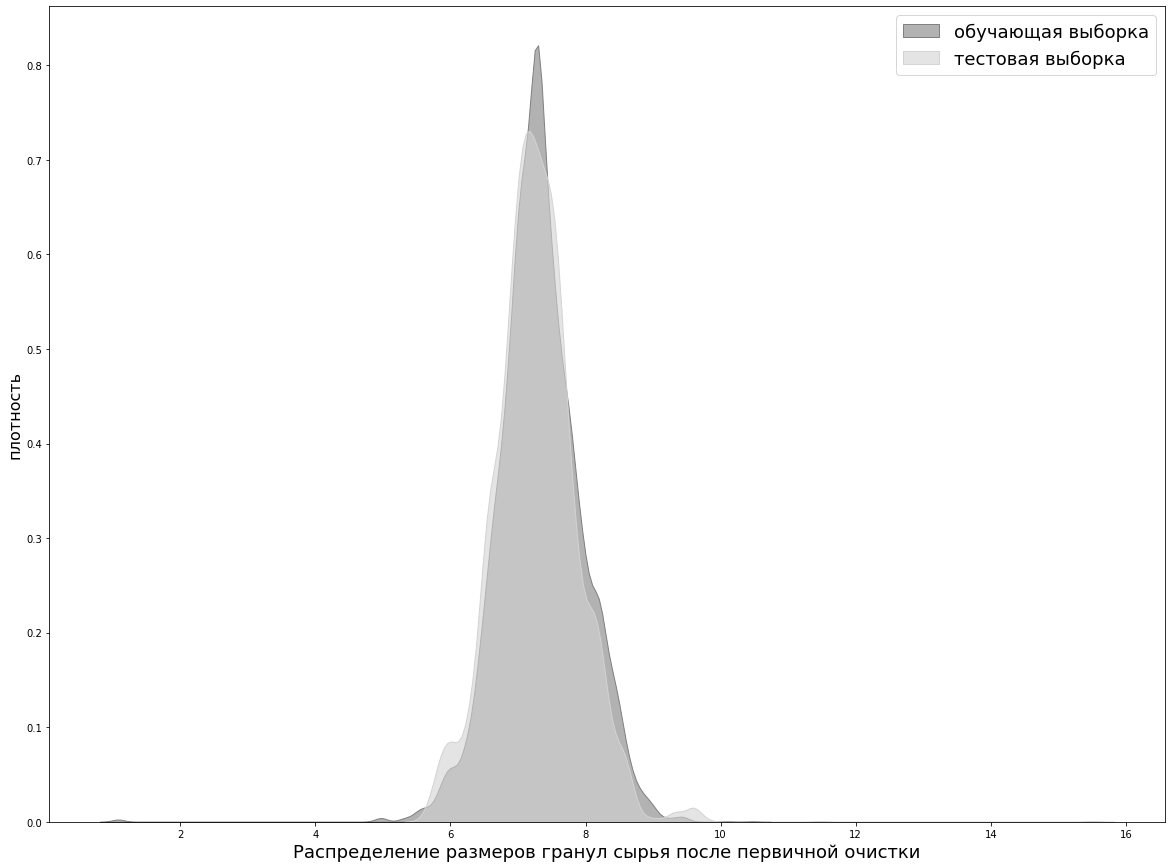

In [17]:
size(gold_recovery_train_new['primary_cleaner.input.feed_size'], gold_recovery_test_new['primary_cleaner.input.feed_size'], 'после первичной очистки')

Размеры гранул с нормальным распределением, оценка модели будет правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [18]:
#суммарная концентрация веществ в сырье
sum_input = gold_recovery_full_new[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol']].sum(axis=1)
#суммарная концентрация веществ в черновом концентрате
sum_output = gold_recovery_full_new[['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol']].sum(axis=1)
#суммарная концентрация веществ в финальном концентрате
sum_final_output = gold_recovery_full_new[['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis=1)

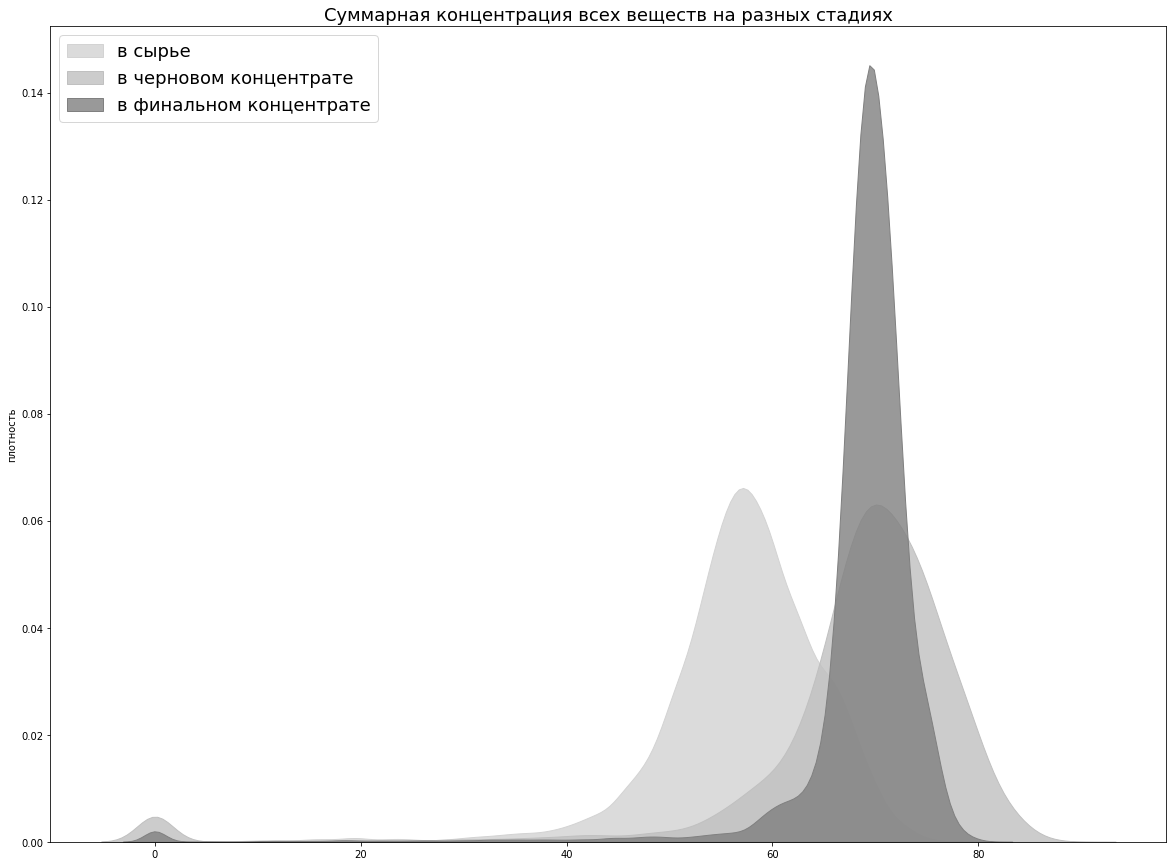

In [19]:
plt.subplots(1,figsize=(20, 15))
sns.kdeplot(sum_input, shade=True, color="lightgray", label="в сырье", alpha=.8)
sns.kdeplot(sum_output, shade=True, color="silver", label="в черновом концентрате", alpha=.8)
sns.kdeplot(sum_final_output, shade=True, color="gray", label="в финальном концентрате", alpha=.8)
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=18)
plt.ylabel('плотность')
plt.legend(loc='upper left', fontsize=18)
plt.show()

Суммарная концентрация всех веществ значительно возрастает после финальной стадии.

Уберем из обучающей выборки все значения равные 0.

In [20]:
gold_recovery_train_new['rougher.output.concentrate_au'].min()

0.0

In [21]:
len_train = len(gold_recovery_train_new)
me = ['au','ag','pb','sol']

for n in me:
    for i in concentrate:
        gold_recovery_train_new = gold_recovery_train_new.loc[(gold_recovery_train_new[i[0] + n[:3]] != 0)]

print("Удалено {} объекта".format(len_train - len(gold_recovery_train_new)))

Удалено 433 объекта


In [22]:
gold_recovery_train_new['rougher.output.concentrate_au'].min()

0.0099999997764825

### Вывод

- Каждое вещество ведёт себя по-разному после каждого этапа очистки, суммарная концентрация всех веществ в процессе возрастает.
- Размер гранул тестовой и обучающей выборки почти не отличаются.

## Модель

Удалим столбец с датой из тестовой выборки.

In [23]:
gold_recovery_test_new.drop(gold_recovery_test_new.columns[[0]], axis = 1, inplace=True)

Удалим из обучающей выборки признаки, отсутствующие в тестовой.

In [24]:
spare = set(gold_recovery_train_new.columns.to_list()) - set(gold_recovery_test_new.columns.to_list())
gold_recovery_train_new = gold_recovery_train_new.drop(spare, axis='columns')

Подготовим признаки.

In [25]:
train_target_final = gold_recovery_train_new['final.output.recovery']
train_target_rougher = gold_recovery_train_new['rougher.output.recovery']

train_features_rougher = gold_recovery_train_new.filter(regex='^rougher',axis=1)
train_features_rougher = train_features_rougher.drop(['rougher.output.recovery'], axis=1)
train_features_final = gold_recovery_train_new.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

test_target_final = gold_recovery_test_new['final.output.recovery']
test_target_rougher = gold_recovery_test_new['rougher.output.recovery']

test_features_rougher = gold_recovery_test_new.filter(regex='^rougher',axis=1)
test_features_rougher = test_features_rougher.drop(['rougher.output.recovery'], axis=1)
test_features_final = gold_recovery_test_new.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

test_features_rougher.fillna(method='ffill', inplace=True)
test_features_final.fillna(method='ffill', inplace=True)

Функция вычисления  итоговой sMAPE.

In [26]:
def sMAPE(y, y_pred): 
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

def total_sMAPE(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

In [27]:
def cr_vl_sc(model, target, features):
    my_scorer = make_scorer(sMAPE)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

Линейная регрессия.

In [28]:
model_lr = defaultdict(list)
model_lr1 = LinearRegression()
model_lr2 = LinearRegression()

rougher_smape = cr_vl_sc(model_lr1, train_target_rougher, train_features_rougher)
final_smape = cr_vl_sc(model_lr2, train_target_final, train_features_final)
total_smape = total_sMAPE(rougher_smape, final_smape)

model_lr['rougher_smape'].append(rougher_smape)
model_lr['final_smape'].append(final_smape)
model_lr['total_smape'].append(total_smape)
pd.DataFrame(model_lr)

,rougher_smape,final_smape,total_smape
0,6.673364,10.756906,9.736021


Дерево решений.

In [29]:
model_dtr = defaultdict(list)

for depth in range(1, 15):
    
    model_dtr1 = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_dtr2 = DecisionTreeRegressor(max_depth=depth, random_state=12345)


    rougher_smape = cr_vl_sc(model_dtr1, train_target_rougher, train_features_rougher)
    final_smape = cr_vl_sc(model_dtr2, train_target_final, train_features_final)
    model_dtr['rougher_smape'].append(rougher_smape)
    model_dtr['final_smape'].append(final_smape)
    model_dtr['total_smape'].append(total_sMAPE(rougher_smape, final_smape))
    model_dtr['depth'].append(depth)

pd.DataFrame(model_dtr).sort_values(by='total_smape')

,rougher_smape,final_smape,total_smape,depth
0,7.958788,9.580493,9.175067,1
2,7.053219,10.120894,9.353975,3
1,7.445589,10.092626,9.430867,2
3,6.969501,10.368131,9.518473,4
4,6.982696,10.675340,9.752179,5
5,7.403920,11.856306,10.743209,6
6,8.070454,11.642417,10.749427,7
7,8.233252,12.670200,11.560963,8
8,8.018742,13.642770,12.236763,9
9,8.168996,14.230412,12.715058,10


Для модели дерево решений лучший sMAPE при max_depth=1.

Случайный лес.

In [31]:
model_rf = defaultdict(list)
for estim in range(1, 20):
    
    model_rf1 = RandomForestRegressor(max_depth=1, n_estimators=estim, random_state=12345)
    model_rf2 = RandomForestRegressor(max_depth=1, n_estimators=estim, random_state=12345)
    
    rougher_smape = cr_vl_sc(model_rf1, train_target_rougher, train_features_rougher)
    final_smape = cr_vl_sc(model_rf2, train_target_final, train_features_final)
    
    model_rf['rougher_smape'].append(rougher_smape)
    model_rf['final_smape'].append(final_smape)
    model_rf['total_smape'].append(total_sMAPE(rougher_smape, final_smape))
    model_rf['estim'].append(estim)

pd.DataFrame(model_rf).sort_values(by='total_smape')

,rougher_smape,final_smape,total_smape,estim
4,7.614417,9.546644,9.063587,5
18,7.598699,9.551904,9.063603,19
11,7.610160,9.549350,9.064552,12
10,7.614312,9.551009,9.066835,11
17,7.618397,9.550562,9.067521,18
5,7.597360,9.558022,9.067857,6
9,7.618992,9.553688,9.070014,10
3,7.662535,9.540202,9.070785,4
14,7.624346,9.555741,9.072892,15
15,7.634876,9.552987,9.073459,16


В модели Случайный лес лучший sMAPE при estim=5.
Лучшая модель: RandomForestRegressor(max_depth=1, n_estimators=5)

Проверим модель на тестовой выборке.

In [32]:
tst = defaultdict(list)

m_1 = LinearRegression()
m_2 =  RandomForestRegressor(max_depth=1, n_estimators=5, random_state=12345)

m_1.fit(train_features_rougher, train_target_rougher)
m_2.fit(train_features_final, train_target_final)

train_predictions_1 = m_1.predict(test_features_rougher)
train_predictions_2 = m_2.predict(test_features_final)

tst['rougher_smape'].append(sMAPE(test_target_rougher, train_predictions_1))
tst['final_smape'].append(sMAPE(test_target_final, train_predictions_2))
tst['total_smape'].append(total_sMAPE(sMAPE(test_target_rougher, train_predictions_1), sMAPE(test_target_final, train_predictions_2)))
pd.DataFrame(tst)

,rougher_smape,final_smape,total_smape
0,8.186632,9.576719,9.229197


Проверим адекватность модели.

In [34]:
dr = defaultdict(list)
dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_final = DummyRegressor(strategy="mean")
dummy_model_rougher.fit(train_features_rougher, train_target_rougher)
dummy_model_final.fit(train_features_final, train_target_final)
test_predictions_rougher = dummy_model_rougher.predict(test_features_rougher)
test_predictions_final = dummy_model_final.predict(test_features_final)

dr['rougher_smape'].append(sMAPE(test_target_rougher, test_predictions_rougher))
dr['final_smape'].append(sMAPE(test_target_final, test_predictions_final))
dr['total_smape'].append(total_sMAPE(sMAPE(test_target_rougher, test_predictions_rougher), sMAPE(test_target_final, test_predictions_final)))
pd.DataFrame(dr)

,rougher_smape,final_smape,total_smape
0,9.062804,10.08255,9.827614


### Вывод

Была отобрана лучшая модель - RandomForestRegressor. Ее значение sMAPE самое низкое.
 